# Import Modules

In [1]:
import cv2
import skimage.util
import matplotlib.pyplot as plt

***
# Initialize and load original image

In [2]:
raw_image = cv2.imread('../images/lenna.png')
# raw_image = cv2.imread('../images/cameraman.png')
# raw_image = cv2.imread('../images/edin_castle.png')
# raw_image = cv2.imread('../images/bowl_fruit.png')
# raw_image = cv2.imread('../images/peppers.png')
# raw_image = cv2.imread('../images/map_of_spain.png')

img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

***
# Display original image and description

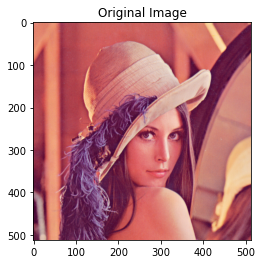

Height        : 512 pixels
Width         : 512 pixels
Color channel : 3 (RGB)


In [3]:
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

***
# Display original image histogram

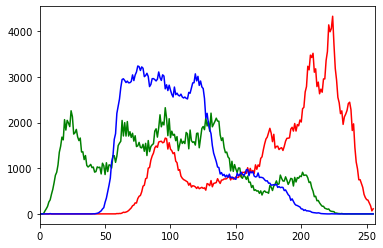

In [4]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rgb], 
                         [i], None,
                         [256],
                         [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()

***
# Show array value each pixel

In [5]:
img_rgb

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

***
# Negative Image

#### - Get height and width of the image

In [6]:
height, width, color_channel = img_rgb.shape
print(f'Height : {height} pixels')
print(f'Width  : {width} pixels')

Height : 512 pixels
Width  : 512 pixels


#### - Change value each pixel with algorithm

- <b>Method-1</b>

In [7]:
# img_negative = img_rgb

# for i in range(0, height - 1): 
#     for j in range(0, width - 1):
#         # Get the pixel value 
#         pixel = img_negative[i, j]

#         # Negate each channel by  
#         # subtracting it from 255

#         # 1st index contains red pixel
#         pixel[0] = 255 - pixel[0]
          
#         # 2nd index contains green pixel
#         pixel[1] = 255 - pixel[1]
          
#         # 3rd index contains blue pixel
#         pixel[2] = 255 - pixel[2] 
          
#         # Store new values in the pixel
#         img_negative[i, j] = pixel

- <b>Method 2 (Optimization)<b>

In [8]:
img_negative = 255 - img_rgb

#### - Show array value each pixel

In [9]:
img_negative

array([[[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 122],
        ...,
        [ 25, 107, 133],
        [ 34, 125, 145],
        [ 55, 156, 165]],

       [[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 122],
        ...,
        [ 25, 107, 133],
        [ 34, 125, 145],
        [ 55, 156, 165]],

       [[ 29, 118, 130],
        [ 29, 118, 130],
        [ 32, 118, 122],
        ...,
        [ 25, 107, 133],
        [ 34, 125, 145],
        [ 55, 156, 165]],

       ...,

       [[171, 237, 195],
        [171, 237, 195],
        [163, 228, 197],
        ...,
        [ 82, 182, 171],
        [ 83, 187, 179],
        [ 78, 193, 176]],

       [[173, 233, 198],
        [173, 233, 198],
        [159, 223, 193],
        ...,
        [ 76, 185, 176],
        [ 74, 184, 174],
        [ 70, 181, 174]],

       [[173, 233, 198],
        [173, 233, 198],
        [159, 223, 193],
        ...,
        [ 76, 185, 176],
        [ 74, 184, 174],
        [ 70, 181, 174]]

#### - Display the negative transformed image

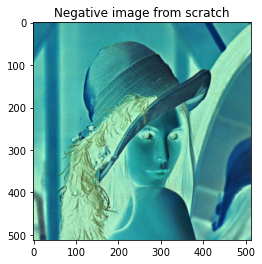

In [10]:
plt.imshow(img_negative)
plt.title('Negative image from scratch')
plt.show()

#### - Histogram

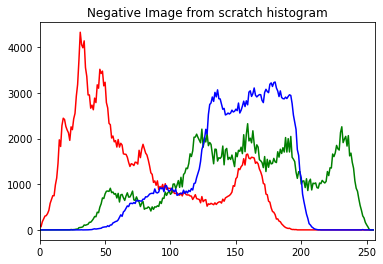

In [11]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([img_negative], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image from scratch histogram')
plt.show()

***
# With image processing module

### - Initialize and load original image

In [12]:
img_raw = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

### - Display original image

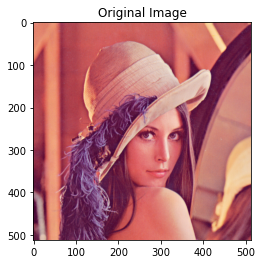

In [13]:
plt.imshow(img_raw)
plt.title('Original Image')
plt.show()

### - Negative image with scikit-image module

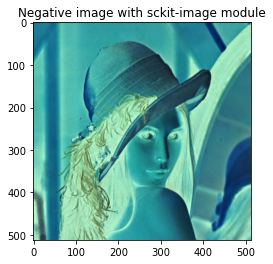

In [14]:
plt.imshow(skimage.util.invert(img_raw))
plt.title('Negative image with sckit-image module')
plt.show()

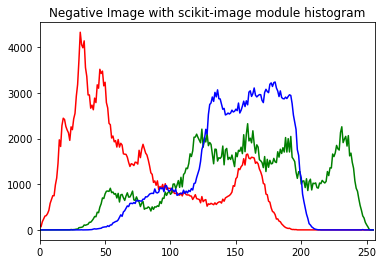

In [15]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([skimage.util.invert(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title('Negative Image with scikit-image module histogram')
plt.show()

### - Negative image with Open-CV

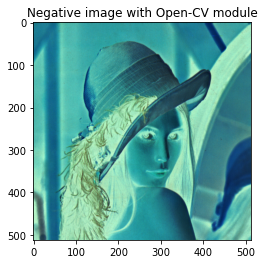

In [16]:
plt.imshow(cv2.bitwise_not(img_raw))
plt.title('Negative image with Open-CV module')
plt.show()

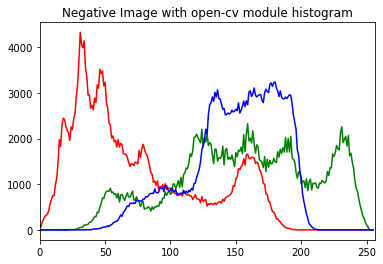

In [17]:
color = ('r', 'g', 'b')
  
for i, col in enumerate(color):
    histr = cv2.calcHist([cv2.bitwise_not(img_raw)], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Negative Image with open-cv module histogram')
plt.show()